In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from google.colab import drive
import plotly.express as px
import plotly.io as pio

This dataset presents the *highest level of education successfully completed* by the individuals of a given population. The main metric is the percentage of population.

We don't have acccess to other metrics which could potentially be useful such as the number of individuals or the population, so we will rely on percentages.

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
folder_path = '/content/drive/MyDrive/'
dataset_path = folder_path + 'edat_lfse_03_linear_2.csv'

### Loading and exploring dataset

In [4]:
educational_attainment = pd.read_csv(dataset_path)
educational_attainment.head()

,DATAFLOW,LAST UPDATE,freq,sex,age,unit,isced11,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EDAT_LFSE_03(1.0),24/04/24 23:00:00,A,F,Y15-64,PC,ED0-2,AT,1995,41.4,NaN
1,ESTAT:EDAT_LFSE_03(1.0),24/04/24 23:00:00,A,F,Y15-64,PC,ED0-2,AT,1996,39.6,NaN
2,ESTAT:EDAT_LFSE_03(1.0),24/04/24 23:00:00,A,F,Y15-64,PC,ED0-2,AT,1997,36.6,NaN
3,ESTAT:EDAT_LFSE_03(1.0),24/04/24 23:00:00,A,F,Y15-64,PC,ED0-2,AT,1998,36.0,NaN
4,ESTAT:EDAT_LFSE_03(1.0),24/04/24 23:00:00,A,F,Y15-64,PC,ED0-2,AT,1999,35.3,NaN


In [5]:
educational_attainment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124944 entries, 0 to 124943
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATAFLOW     124944 non-null  object 
 1   LAST UPDATE  124944 non-null  object 
 2   freq         124944 non-null  object 
 3   sex          124944 non-null  object 
 4   age          124944 non-null  object 
 5   unit         124944 non-null  object 
 6   isced11      124944 non-null  object 
 7   geo          124944 non-null  object 
 8   TIME_PERIOD  124944 non-null  int64  
 9   OBS_VALUE    124158 non-null  float64
 10  OBS_FLAG     23381 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 10.5+ MB


In [6]:
print(f'Missing values for each column:\n{educational_attainment.isnull().sum()}')

Missing values for each column:
DATAFLOW            0
LAST UPDATE         0
freq                0
sex                 0
age                 0
unit                0
isced11             0
geo                 0
TIME_PERIOD         0
OBS_VALUE         786
OBS_FLAG       101563
dtype: int64


In [7]:
for column_name in educational_attainment.columns:
  print(f'The column {column_name} has {len(educational_attainment[column_name].unique())} unique values.')

The column DATAFLOW has 1 unique values.
The column LAST UPDATE has 1 unique values.
The column freq has 1 unique values.
The column sex has 3 unique values.
The column age has 10 unique values.
The column unit has 1 unique values.
The column isced11 has 6 unique values.
The column geo has 38 unique values.
The column TIME_PERIOD has 32 unique values.
The column OBS_VALUE has 982 unique values.
The column OBS_FLAG has 6 unique values.


In [8]:
def print_df_unique_values(df, threshold):
  for column_name in df.columns:
    if len(df[column_name].unique()) <= threshold:
      print(f'The column {column_name} has the following unique values: {df[column_name].unique()}.')

In [9]:
threshold = 10
print_df_unique_values(educational_attainment, threshold)

The column DATAFLOW has the following unique values: ['ESTAT:EDAT_LFSE_03(1.0)'].
The column LAST UPDATE has the following unique values: ['24/04/24 23:00:00'].
The column freq has the following unique values: ['A'].
The column sex has the following unique values: ['F' 'M' 'T'].
The column age has the following unique values: ['Y15-64' 'Y20-24' 'Y25-34' 'Y25-64' 'Y30-34' 'Y30-54' 'Y35-44' 'Y45-54'
 'Y45-64' 'Y55-64'].
The column unit has the following unique values: ['PC'].
The column isced11 has the following unique values: ['ED0-2' 'ED3-8' 'ED3_4' 'ED3_4GEN' 'ED3_4VOC' 'ED5-8'].
The column OBS_FLAG has the following unique values: [nan 'u' 'b' 'd' 'bu' 'du'].


In [10]:
educational_attainment.describe()

,TIME_PERIOD,OBS_VALUE
count,124944.000000,124158.000000
mean,2010.890751,41.817598
std,8.268502,25.395672
min,1992.000000,0.400000
25%,2004.000000,20.200000
50%,2012.000000,37.000000
75%,2018.000000,61.600000
max,2023.000000,98.400000


In [11]:
print(f'The column geo has the following unique values: {educational_attainment["geo"].unique()}.')

The column geo has the following unique values: ['AT' 'BA' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EA20' 'EE' 'EL' 'ES'
 'EU27_2020' 'FI' 'FR' 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK'
 'MT' 'NL' 'NO' 'PL' 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK'].


Observations:
- columns have inconsistent or not very suggestive names
- The columns DATAFLOW, LAST UPDATE, freq and unit have only one value
- The column sex has value T, but it cannot be computed from F and M as it considers the population of males and females
- The column age has overlapping values (e.g. Y25-64 with Y25-34 and Y25-34).
- isced11 stands for International Standard Classification of Education 2011.
  - **ED0-2**: Less than primary, primary and lower secondary education
  - **ED3_4**: Upper secondary and post-secondary non-tertiary education
  - **ED3_4GEN**: programme orientation general (from 2014)
  - **ED3_4VOC**: programme orientation vocational (from 2014)
  - **ED5-8**: Short-cycle tertiary education, bachelor's or equivalent level, master's or equivalent level, doctoral or equivalent level.

  In the Romanian school system, these coincide with:
  - ISCED nivel 0 – Educaţia timpurie
  - ISCED nivel 1 – Învăţământ primar
  - ISCED nivel 2 – Învăţământ gimnazial
  - ISCED nivel 3 – Învăţământ liceal
  - ISCED nivel 4 – Învăţământ postliceal
  - ISCED nivel 5 – Învăţământ superior de scurtă durată
  - ISCED nivel 6 – Licenţă sau nivel echivalent
  - ISCED nivel 7 – Master sau nivel echivalent
  - ISCED nivel 8 – Doctorat sau nivel echivalent

- As such, in our dataset we have the following intervals:
  - ED0-2: Last attained education level is between kindergarden and gymnasium ("invatamant primar") - These are people who have dropped out before entering high school as at least 10
  - ED3-4: Last attained education level is between high school and postliceal studies ("studii medii")
  - ED5-8: Last attained education level is between associate's degrees and doctorate's ("studii superioare")
- In practice, we will be plotting what percentages of the population have **stopped schooling** during primary education (ED0-2), at the high school level (ED3-5) or went on and got an university degree (ED6-8).
- We can also notice that ED3-8 overlaps with ED3_4 and ED5-8 and ED3_4 is the sum of ED3_4 GEN and ED3_4 VOC. ED0-2, ED3_4 and ED5-8 add up to 100%
- The values of OBS_FLAG stand for:
  - **u**: low reliability
  - **b**: break in time series`
  - **bu**: both b and u
  - **d**: delayed
  - **du**: both d and u
- geo has values EA20 and EU27_2020, but they can't be computed from the other values as it considers the country populations
- the dataset is missing 786 observed values out of 124944 (0.63%)
- As the averages depend on the population, which we don't have access to, we have to be careful when working with aggregation metrics

In [12]:
educational_attainment['age'].value_counts()

age
Y20-24    13902
Y25-34    13902
Y30-34    13902
Y15-64    12354
Y25-64    12354
Y35-44    12354
Y45-54    12354
Y55-64    12354
Y30-54    10734
Y45-64    10734
Name: count, dtype: int64

### Data Preprocessing
1. Remove irrelevant columns
2. Rename columns
3. Remove overlapping categories
4. Format isced11 codes in the same format
5. Save the results to a new csv for further processing

- Remove unneeded columns. Rename remaining columns to more suggestive names.




In [13]:
# column operations
columns_to_remove = ['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG']
renamed_columns = {'sex': 'Sex', 'age': 'Age', 'isced11': 'Educational Level', 'TIME_PERIOD': 'Year', 'OBS_VALUE': 'Attainment Percentage', 'geo': 'Country Code'}
educational_attainment.drop(columns = columns_to_remove, inplace = True)
educational_attainment.rename(columns = renamed_columns, inplace = True)

- Remove overlapping categories


In [14]:
# row operations
educational_attainment = educational_attainment[~educational_attainment['Educational Level'].isin(['ED3_4GEN', 'ED3_4VOC', 'ED3-8'])]
educational_attainment = educational_attainment[~educational_attainment['Age'].isin(['Y30-34', 'Y25-64', 'Y45-64', 'Y30-54'])]
educational_attainment.loc[educational_attainment['Educational Level'] == 'ED3_4', 'Educational Level'] = 'ED3-4'

In [15]:
# Pivot Age
educational_attainment = educational_attainment.pivot_table(index=['Sex', 'Educational Level', 'Country Code', 'Year'], columns='Age', values='Attainment Percentage').reset_index()
educational_attainment.head()


Age,Sex,Educational Level,Country Code,Year,Y15-64,Y20-24,Y25-34,Y35-44,Y45-54,Y55-64
0,F,ED0-2,AT,1995,41.4,25.5,27.0,37.2,44.3,61.0
1,F,ED0-2,AT,1996,39.6,22.2,25.5,34.0,42.2,59.5
2,F,ED0-2,AT,1997,36.6,19.9,21.7,30.9,39.3,54.4
3,F,ED0-2,AT,1998,36.0,17.6,20.4,28.5,39.0,53.4
4,F,ED0-2,AT,1999,35.3,17.1,20.1,27.4,37.6,51.8


- We will rename the ISCED codes to more suggestive names.

In [16]:
 educational_attainment['Educational Level'] = educational_attainment['Educational Level'].replace(['ED0-2'], 'Primary')
 educational_attainment['Educational Level'] = educational_attainment['Educational Level'].replace(['ED3-4'], 'High school')
 educational_attainment['Educational Level'] = educational_attainment['Educational Level'].replace(['ED5-8'], 'University')

- Extract provided averages (which cannot be computed by us as we lack country population data by year and gender)

In [17]:
educational_attainment_averages = educational_attainment[educational_attainment['Country Code'].isin(['EA20', 'EU27_2020'])]
educational_attainment.to_csv('educational_attainment_averages.csv')

- Let's now output the unique dimension values that we have in the dataset


In [18]:
educational_attainment = educational_attainment[~educational_attainment['Country Code'].isin(['EA20', 'EU27_2020'])]
print_df_unique_values(educational_attainment, 37)

The column Sex has the following unique values: ['F' 'M' 'T'].
The column Educational Level has the following unique values: ['Primary' 'High school' 'University'].
The column Country Code has the following unique values: ['AT' 'BA' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL'
 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK'].
The column Year has the following unique values: [1995 1996 1997 1998 1999 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 1992 1993 1994
 2000 2001 2002 2003].


In [19]:
print_df_unique_values(educational_attainment_averages, 10)

The column Sex has the following unique values: ['F' 'M' 'T'].
The column Educational Level has the following unique values: ['Primary' 'High school' 'University'].
The column Country Code has the following unique values: ['EA20' 'EU27_2020'].


We save the cleaned up data to a new csv file.

In [20]:
output_file_name = 'educational_attainment_preprocessed.csv'
educational_attainment.to_csv(output_file_name)

In [21]:
educational_attainment.head()


Age,Sex,Educational Level,Country Code,Year,Y15-64,Y20-24,Y25-34,Y35-44,Y45-54,Y55-64
0,F,Primary,AT,1995,41.4,25.5,27.0,37.2,44.3,61.0
1,F,Primary,AT,1996,39.6,22.2,25.5,34.0,42.2,59.5
2,F,Primary,AT,1997,36.6,19.9,21.7,30.9,39.3,54.4
3,F,Primary,AT,1998,36.0,17.6,20.4,28.5,39.0,53.4
4,F,Primary,AT,1999,35.3,17.1,20.1,27.4,37.6,51.8


In [22]:
!cp $output_file_name $folder_path

# Creating visualisations

Let's begin by exploring how educational attainment levels have changed in Romania throughout the years.

We will do this by creating a 100 percent bar chart showing the how the Romanian demographic is split between the three attainment levels we have data for.



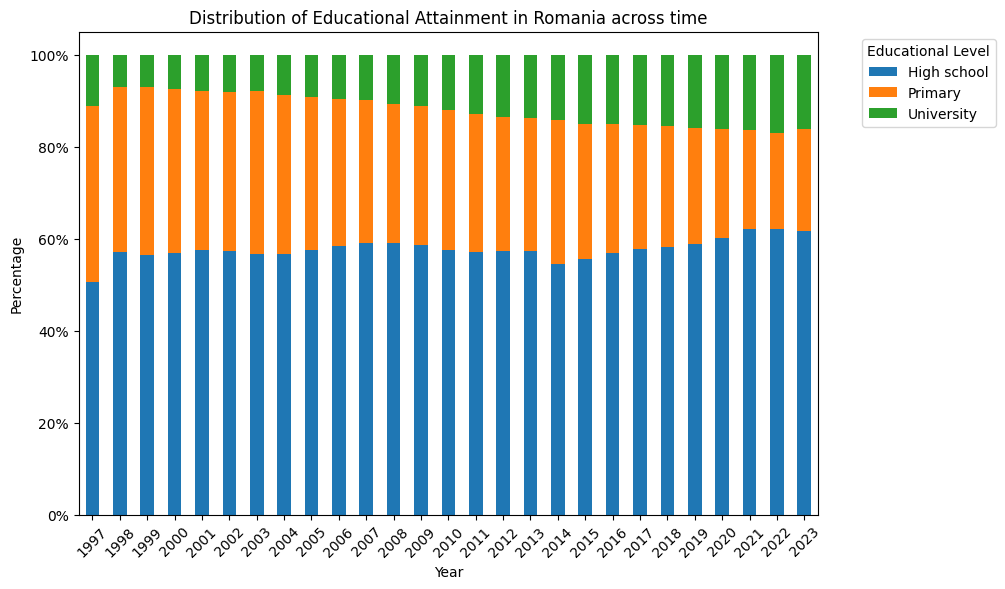

In [23]:

# Filter the DataFrame for the required country and sex
filtered_df = educational_attainment[(educational_attainment['Country Code'] == 'RO') & (educational_attainment['Sex'] == 'T')]

# Pivot the DataFrame
pivot_df = filtered_df.pivot(index='Year', columns='Educational Level', values='Y15-64')

# Normalize the data to get percentages
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Plotting the 100% stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Distribution of Educational Attainment in Romania across time')
plt.legend(title='Educational Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()




Let us now also break this graph down into series across time:

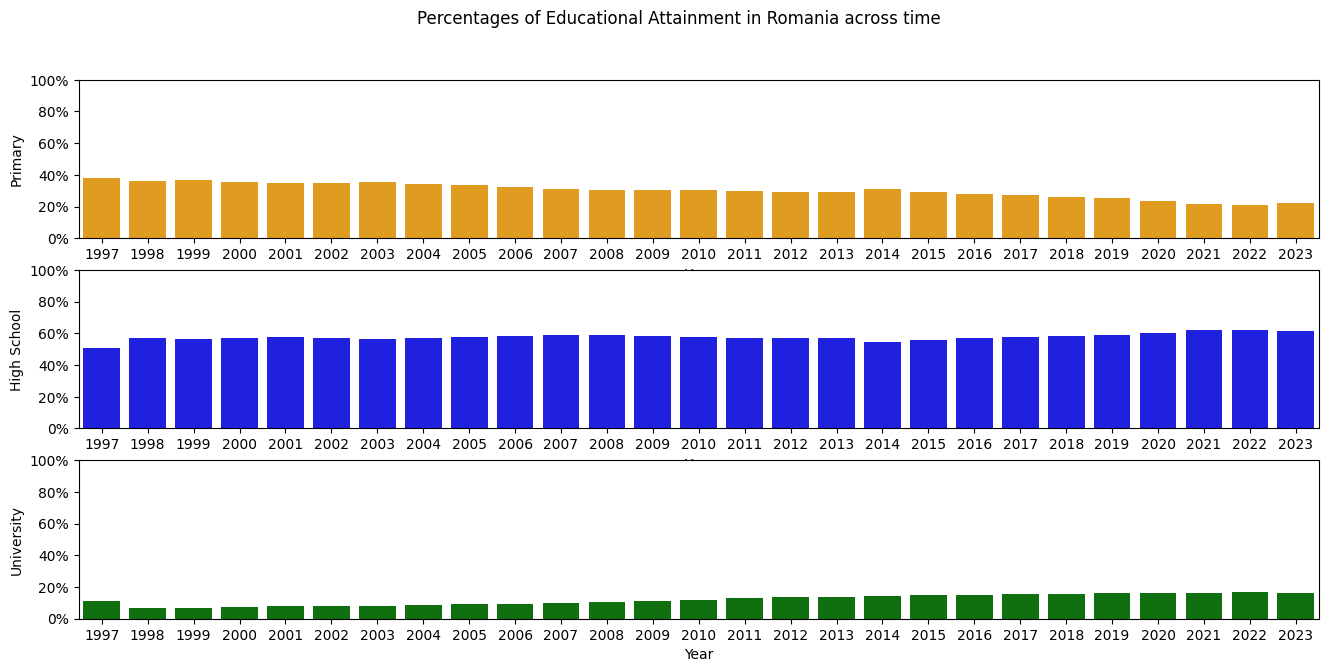

In [24]:
filtered_data = educational_attainment.loc[(educational_attainment['Country Code'] == "RO") & (educational_attainment["Sex"] == "T")]

data_primary = filtered_data.loc[filtered_data["Educational Level"] == "Primary"]
data_highschool = filtered_data.loc[filtered_data["Educational Level"] == "High school"]
data_university = filtered_data.loc[filtered_data["Educational Level"] == "University"]

fig, axes = plt.subplots(3,1)
plt.suptitle('Percentages of Educational Attainment in Romania across time')

fig.set_size_inches(16,7)
axes[0].set_ylim([0, 100])
axes[1].set_ylim([0, 100])
axes[2].set_ylim([0, 100])
axes[0].set_ylabel("Primary")
axes[1].set_ylabel("High School")
axes[2].set_ylabel("University")
axes[0].yaxis.set_major_formatter(PercentFormatter(100))
axes[1].yaxis.set_major_formatter(PercentFormatter(100))
axes[2].yaxis.set_major_formatter(PercentFormatter(100))

sns.barplot(x="Year",  y="Y15-64", data=data_primary, color="orange", ax=axes[0])
sns.barplot(x="Year",  y="Y15-64", data=data_highschool, color="blue", ax=axes[1])
sns.barplot(x="Year",  y="Y15-64", data=data_university, color="green", ax=axes[2])

plt.show()



We can see that the percentages change across time, with university-level  attainment increasing and primary education decreasing. This is good news as it suggests that:
- Less and less people are dropping out of school
- More people are pursuing university degrees.

The next question is: How does the univesity level attainment in Romania compare to the rest of the European Union?



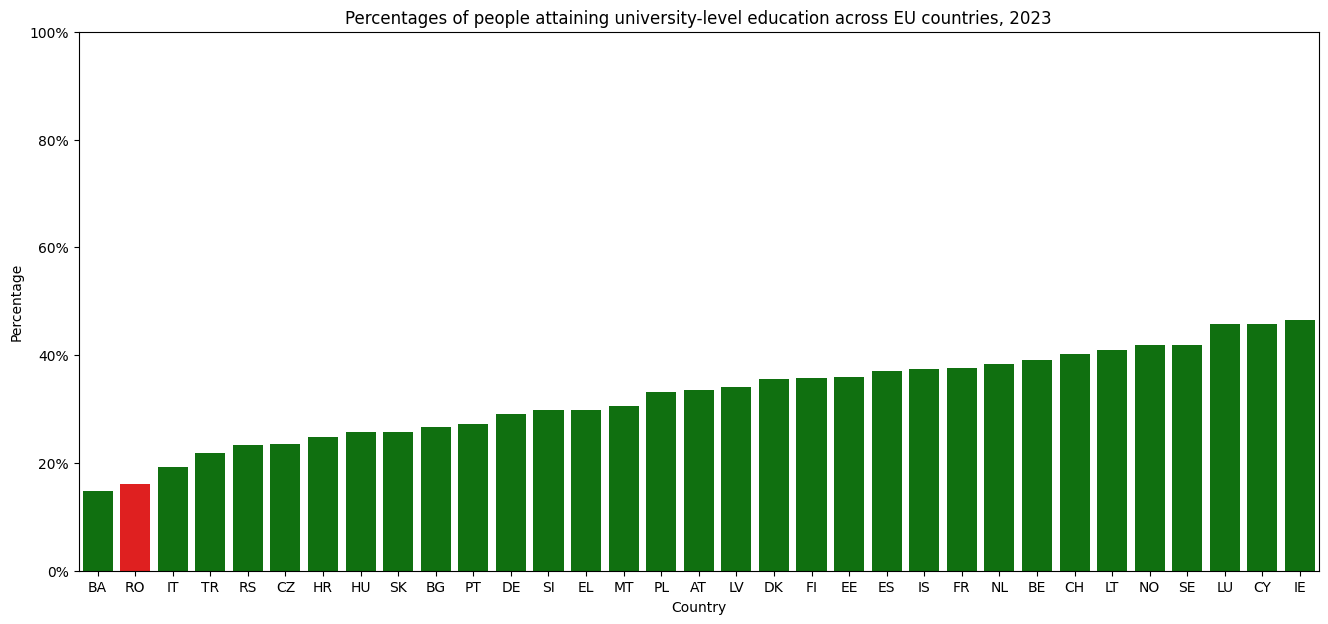

In [25]:
filtered_data_ro_vs_ue = educational_attainment.loc[(educational_attainment["Sex"] == "T") & (educational_attainment["Year"] == 2023)
  & (educational_attainment["Educational Level"] == "University")].sort_values("Y15-64")

fig = plt.figure(2)
plt.title('Percentages of people attaining university-level education across EU countries, 2023')

ax = fig.gca()
fig.set_size_inches(16,7)
palette = {}
for country in educational_attainment["Country Code"]:
  palette[country] ="green"
palette["RO"] = "red"
sns.barplot(x="Country Code",  y="Y15-64", data=filtered_data_ro_vs_ue, hue='Country Code', palette=palette)
ax.set_ylim([0,100])
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))

plt.show()

Here we can see that despite the percentage increase at the university level, Romania still has the second lowest percentage of people who have achieved university-level degrees.

Let's now compare how Romania's split of educational attainment levels compares to the EU averages for the entire population:

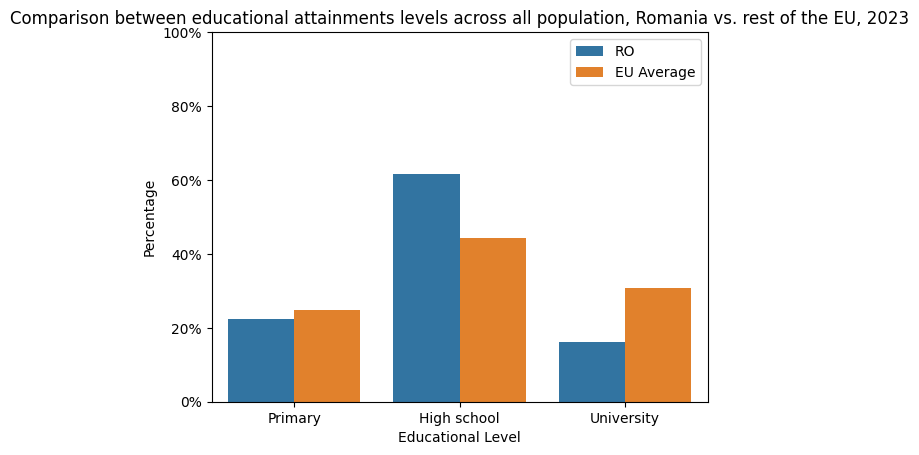

In [26]:
ro_attainment = educational_attainment.loc[(educational_attainment['Country Code'] == "RO") & (educational_attainment["Sex"] == "T")
 & (educational_attainment["Year"] == 2023)]

eu_attainment = educational_attainment_averages.loc[(educational_attainment_averages['Country Code'] == "EU27_2020") & (educational_attainment_averages["Sex"] == "T")
 & (educational_attainment_averages["Year"] == 2023)]

combined = pd.concat([ro_attainment, eu_attainment])


fig = plt.figure(3)
plt.title('Comparison between educational attainments levels across all population, Romania vs. rest of the EU, 2023')

ax = fig.gca()
ax.set_ylim([0, 100])
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
sns.barplot(x="Educational Level",  y="Y15-64", data=combined, hue="Country Code")

handles, _ = ax.get_legend_handles_labels()
new_labels = ['RO', 'EU Average']
ax.legend(handles=handles, labels=new_labels)

plt.show()

The surprising finding here is that nowadays the percentage of population that only achieved primary education in Romania is actually lower than the EU average. It seems that the bulk of the diference comes from the fact that many more people stop at the High school level rather than pursue higher education.

To wrap up our analysis on university-level attainment, let's see a timelapse of how these percentages have evolved in the European Union across time:

In [27]:
!pip install pycountry
import pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 17.6 MB/s eta 0:00:00


In [28]:

def get_3_letter_code(two_letter_code):
  if two_letter_code == "UK":
    return "GBR"
  country = pycountry.countries.get(alpha_2=two_letter_code)
  if country == None:
    return two_letter_code
  return country.__getattr__('alpha_3')

educational_attainment["Country Code"] = educational_attainment["Country Code"].apply(get_3_letter_code)
educational_attainment = educational_attainment.sort_values(by='Year')

selection = educational_attainment.loc[(educational_attainment["Sex"] == "T") &(educational_attainment["Educational Level"] == "University")]

fig = px.choropleth(selection,
                    locations="Country Code",
                    color='Y15-64',
                    hover_name='Country Code',
                    animation_frame='Year',
                    color_continuous_scale=px.colors.sequential.Mint,
                    projection='natural earth', scope='europe')

fig.update_layout(title_text='Attainment of Univerisity studies across the EU, Percentages by year',
                  geo=dict(showframe=False, showcoastlines=False))

fig.show()
print(educational_attainment.columns)

Index(['Sex', 'Educational Level', 'Country Code', 'Year', 'Y15-64', 'Y20-24',
       'Y25-34', 'Y35-44', 'Y45-54', 'Y55-64'],
      dtype='object', name='Age')


A few key observations arise.

It is clear that in the past 30 years rates for university degree attainment have increased a lot across the EU. In 1997, the highest recorded percentage was 25.4% (Norway) compared to 2023's 46.6% (Ireland).

The East/West divide can also be noticed in the graph, with Eastern European countries having much lower percentages of university attainment. This may seem puzzling when you recall that university is free in the majority of the Eastern European countries, whereas countries such as Ireland, the UK or Netherlands have very high attainment percentages despite high fees (a negative incentive). However, it is most likely a consequence of history as well as difference in countries' wealth.

Let us now focus on Romania going forward. We will begin by exporing differences between sexes when it comes to attaining education.

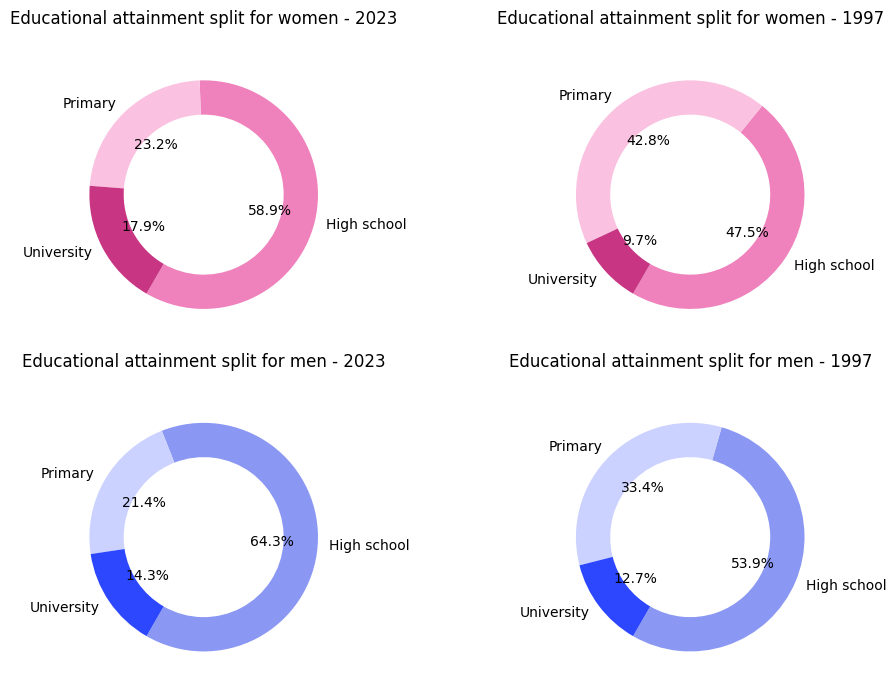

In [29]:
# Filter data for each chart
educational_attainment = educational_attainment.sort_values("Educational Level")
df_female_2023 = educational_attainment[(educational_attainment['Sex'] == 'F') & (educational_attainment['Country Code'] == 'ROU') & (educational_attainment['Year'] == 2023)]
df_male_2023 = educational_attainment[(educational_attainment['Sex'] == 'M') & (educational_attainment['Country Code'] == 'ROU') & (educational_attainment['Year'] == 2023)]
df_female_hist = educational_attainment[(educational_attainment['Sex'] == 'F') & (educational_attainment['Country Code'] == 'ROU') & (educational_attainment['Year'] == 1997)]
df_male_hist = educational_attainment[(educational_attainment['Sex'] == 'M') & (educational_attainment['Country Code'] == 'ROU') & (educational_attainment['Year'] == 1997)]

# Define a function to create a donut chart
def create_donut_chart(ax, data, title, colors):
    wedges, texts, autotexts = ax.pie(
        data['Y15-64'],
        labels=data['Educational Level'],
        autopct='%1.1f%%',
        startangle=-120,
        wedgeprops=dict(width=0.3),
        colors=colors
    )
    for autotext in autotexts:
        autotext.set_color('black')
    ax.set_title(title, pad=20)

pink_palette = ["#ef82bc", "#fac2e0",'#c83583']
blue_palette = ["#8a97f3", "#cbd2ff",'#2d47ff']

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Create donut charts
create_donut_chart(axes[0][0], df_female_2023, 'Educational attainment split for women - 2023', pink_palette)
create_donut_chart(axes[0][1], df_female_hist, 'Educational attainment split for women - 1997', pink_palette)

create_donut_chart(axes[1][0], df_male_2023, 'Educational attainment split for men - 2023', blue_palette)
create_donut_chart(axes[1][1], df_male_hist, 'Educational attainment split for men - 1997', blue_palette)
# Show plot
plt.tight_layout()
plt.show()

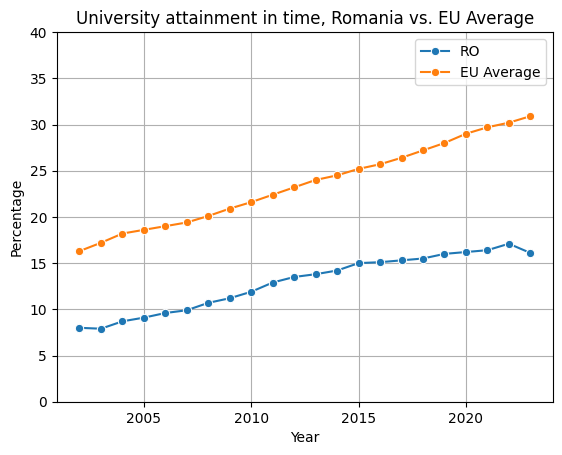

In [30]:
ro_attainment = educational_attainment.loc[(educational_attainment['Country Code'] == "ROU") & (educational_attainment["Sex"] == "T") & (educational_attainment["Educational Level"] == "University") & (educational_attainment["Year"] > 2001)]
eu_attainment = educational_attainment_averages.loc[(educational_attainment_averages['Country Code'] == "EU27_2020") & (educational_attainment_averages["Sex"] == "T") & (educational_attainment_averages["Educational Level"] == "University")]
combined = pd.concat([ro_attainment, eu_attainment])

fig = plt.figure(3)
plt.title('University attainment in time, Romania vs. EU Average')

ax = fig.gca()
ax.set_ylim([0, 40])

plt.ylabel('Percentage')

sns.lineplot(x="Year",  y="Y15-64", data=combined, hue="Country Code", marker='o')

handles, _ = ax.get_legend_handles_labels()
new_labels = ['RO', 'EU Average']
ax.legend(handles=handles, labels=new_labels)

ax.grid(True)
plt.show()